# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat

df = pd.read_csv('data/human_body_temperature.csv')

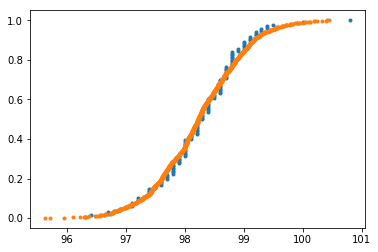

In [3]:
# Exercise 1
x1 = np.sort(df['temperature'])
y1 = np.arange(1, len(x1)+1)/len(x1)

mean_s = np.mean(x1)
std_s = np.std(x1,ddof=1)

# generate a random normal distribution based on the 
# sample mean and sample standard deviation
samples = np.random.normal(mean_s, std_s, size=1000)
x2 = np.sort(samples)
y2 = np.arange(1, len(samples)+1)/len(samples)

# plot the sample data as well as the random
# sample to compare CDF
plt.plot(x1,y1,marker='.',linestyle='none')
plt.plot(x2,y2,marker='.',linestyle='none')

plt.show()

#1) The distribution of body temperatures is considered a normal distribution, based on the comparison of the Cumulative Distribution Function (CDF) between the provided dataset and the random sample of the normal distribution (with a similar mean and standard deviation to the dataset).

#2) The sample size is sufficiently large. For CLT to apply, a sample size of 30 is sufficient.

In [38]:
# Exercise 3
print("Sample mean temperature:", mean_s)

# One-sample t-test (two-tail)
mean_tscore, mean_pvalue = stat.ttest_1samp(x1,98.6)
print("t-score for population mean temperature:", mean_tscore)
print("p-value for population mean temperature:", mean_pvalue)

Sample mean temperature: 98.2492307692
t-score for population mean temperature: -5.45482329236
p-value for population mean temperature: 2.41063204156e-07


#3) In order to determine if the true population mean of body temperature is 98.6 degrees, we will initially assume that the true mean is equal to 98.6 degrees (the null hypothesis).

The one-sample t-test applies here, as we are testing against the true mean value only. Since we do not have a population standard deviation, the t-test will be used.

From the above result, we can reject this null hypothesis, since the stated p-value is significantly smaller than 2.5%.

If we were to attempt to use the z-test, we would need to estimate that the population standard deviation is roughly equal to the sample standard deviation. With n=130, the t-score for a 95% confidence interval is not too far off than the z-score (at n=100, the t-score is 1.984, whereas the z-score is 1.960). This makes it even less likely that the null hypothesis holds true.

In [45]:
# Exercise 4
# Assume 95% confidence interval
# Use n=100 value: t-score = 1.984
se_s = stat.sem(x1)
moe_s = se_s * 1.984

ci_lower = mean_s - moe_s
ci_upper = mean_s + moe_s
print('Confidence interval: (', ci_lower, ',', ci_upper, ')')
print('When temperatures are below', ci_lower, 'degrees F or greater than', ci_upper, 'degrees F, we should consider it abnormal.')

Confidence interval: ( 98.1216508062 , 98.3768107322 )
When temperatures are below 98.1216508062 degrees F or greater than 98.3768107322 degrees F, we should consider it abnormal.


In [54]:
# Exercise 5
df_male = df[df['gender'] == 'M']['temperature']
df_female = df[df['gender'] == 'F']['temperature']

mean_m = np.mean(df_male)
mean_f = np.mean(df_female)
print("Male mean temperature:", mean_m)
print("Female mean temperature:", mean_f)

gender_tscore, gender_pvalue = stat.ttest_ind(df_male,df_female,equal_var=False)
print("t-score for gender temperature difference:", gender_tscore)
print("p-value for gender temperature difference:", gender_pvalue)

Male mean temperature: 98.1046153846154
Female mean temperature: 98.39384615384613
t-score for gender temperature difference: -2.28543453817
p-value for gender temperature difference: 0.0239382641829


#5) A two-sample t-test was used here, where the data between the two is independent of one another (ie. not paired), with the null hypothesis being that the mean temparature between males and females are equal.

The p-value indicates that with 95% confidence, we can reject this stated null hypothesis and therefore there is a difference in temperatures between males and females.